# Myopia Clusters

In this assignment, you’ll apply what you learned about unsupervised learning by fitting data to a model and using clustering algorithms to place data into groups. Then, you’ll create a visualisation that shares your findings.

In [13]:
# Import Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Part 1: Prepare the Data

In [14]:
# Read `myopia.csv` into a Pandas DataFrame.
file_path = Path("resources/myopia.csv")
raw_df = pd.read_csv(file_path)
raw_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [15]:
# Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. 
# Remove the "MYOPIC" column from the dataset.
df = raw_df["MYOPIC"]
df = raw_df.drop("MYOPIC", axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [16]:
# So that columns that contain larger values do not influence the outcome more than columns with smaller values:
# Standardise your dataset.
df_scaled = StandardScaler().fit_transform(df)
df_scaled[1]

array([-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
       -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
       -0.34093217, -0.87508755,  0.98713773,  1.0032415 ])

### Part 2: Apply Dimensionality Reduction


In [17]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

   **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

In [18]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
    # To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
# Reduce dimensions with PCA
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_scaled)

# Further reduce dimensions with t-SNE
tsne = TSNE(random_state=42)
df_tsne = tsne.fit_transform(df_pca)

/Users/liamtwomey/opt/anaconda3/envs/project-4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/liamtwomey/opt/anaconda3/envs/project-4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


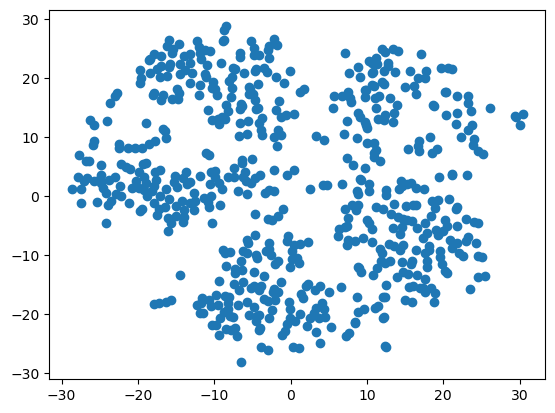

In [19]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

- Use a `for` loop to determine the inertia for each `k` between 1 through 10.

- If possible, determine where the elbow of the plot is, and at which value of `k` it appears.

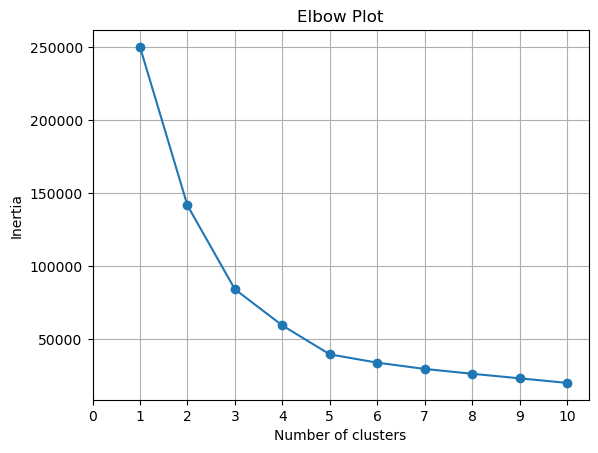

In [20]:
# Use K-means to find clusters
inertia = []
k_list = list(range(1, 11))

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tsne)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(k_list, inertia, marker="o")
plt.xticks(range(0,11))
plt.title("Elbow Plot")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

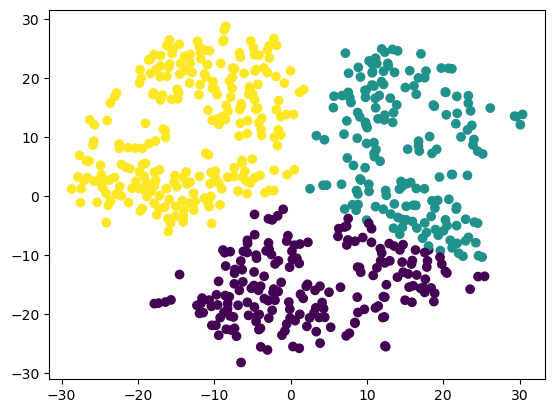

In [21]:
# Use K-means to cluster the t-SNE reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_tsne)

# Colour the 3 distinct clusters in the scatter plot
plt.scatter(df_tsne[:,0], df_tsne[:,1], c=labels)
plt.show()

### Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

## ANSWER: Based on the t-SNE plot and elbow plot, there appear to be 3 distinct clusters in the myopia data. Therefore, it is recommended to cluster the patients into 3 groups.